In [1]:
#Import libraries
import pandas as pd
import nltk
import tweepy
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import os
os.chdir('F:/Use Cases ML/SMA')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Importing twitter API credentials
%run ./keys_tweeter.ipynb

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
search_terms = 'spinal muscular atrophy '
#search_terms = 'covid19'
#search_words = ["spinal muscular atrophy", "SMA", "#spinal muscular atrophy"]
lang = 'english'
date_since = "2021-03-01"
#date_until = "2021-05-12"
tweets = []
likes = []
time = []
#cursor = tweepy.Cursor(api.search,q=search_terms,tweet_mode = "extended",since='2021-01-01', until='2021-05-10').items()
for i in tweepy.Cursor(api.search,q=search_terms,lang="en",tweet_mode = "extended",\
                       since_id=date_since).items():
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [5]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [6]:
#Removing retweets
df = df[~df.tweets.str.contains("RT | raise")]
df=df.reset_index(drop=True)

In [7]:
df.to_csv('Tweets.csv',index=True)

In [8]:
mostlike = df.loc[df.likes.nlargest(10).index]

In [9]:
mostlike

tweets  likes  \
32  @iamsrk @iamsrk Plz extend a little help to #a...     23   
56  The insights enabled the design of a range of ...     20   
61  Actin and its regulation in Spinal Muscular At...     14   
12  @rahulvaidya23 plz help us to reach out to mor...     13   
9   @PriyankaJShukla  Do not let #Ayaansh get sepa...     10   
19  @PragyaLive @PragyaLive plz help us to reach o...      6   
35  Matthew Klein, MD, Chief Development Officer a...      5   
54  Daniel also has a genetic disease called Spina...      5   
86  8 year old daughter suffering from Spinal Musc...      5   
21  @mikefeigin You mean you haven’t started study...      4   

                  time  
32 2021-05-14 13:47:49  
56 2021-05-13 15:20:06  
61 2021-05-13 09:16:47  
12 2021-05-14 23:10:18  
9  2021-05-15 03:57:58  
19 2021-05-14 19:47:47  
35 2021-05-14 13:02:04  
54 2021-05-13 17:13:21  
86 2021-05-12 10:07:03  
21 2021-05-14 19:12:42

In [10]:
list_of_sentences = [sentence for sentence in df.tweets]
lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [11]:
#Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [12]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [25]:
#Removing all Stop Words
stem2 = []
nlp.Defaults.stop_words |= {"muscular","spinal","atrophi","plz","eidmubarak","httpstcogffidzouvt",
                            "extend","3yr","ayaansh","veri","need","60","cant","hold","help",
                            "httpstco2fbyisqr85","saveayaanshgupta","atrophyh","old","httpstcot0bldsdqgk",
                            "fightssma3yr","evn","lil","littl","fightssma","come","sir"}
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [26]:
df1 = pd.DataFrame(stem2)
df1 = df1[0].value_counts()

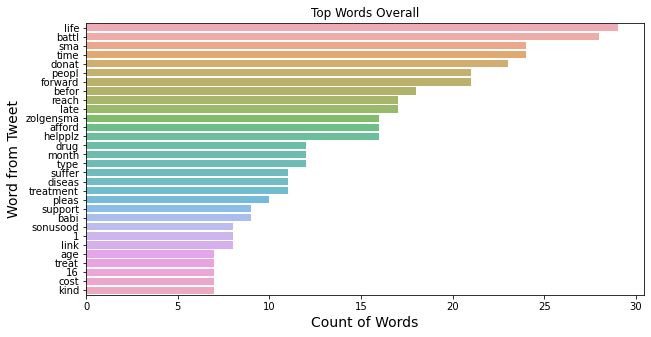

In [27]:
df1 = df1[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df1.values, df1.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=14)
plt.xlabel('Count of Words', fontsize=14)
plt.show()

In [16]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [17]:
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

In [18]:
#df7

In [19]:
#df7.drop(["Ayaansh FightsSma 3yr old"],axis=0,inplace=True)

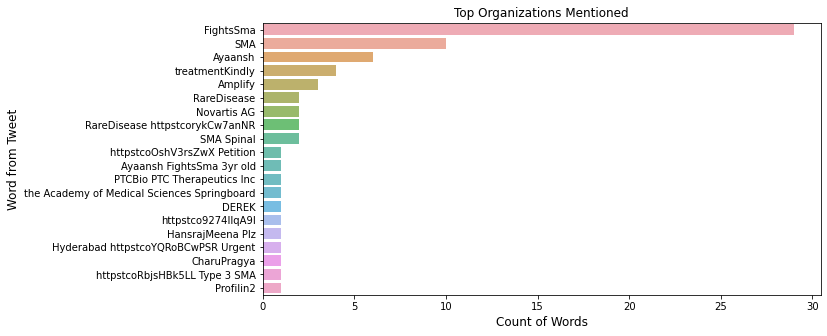

In [20]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [21]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

In [22]:
#df11

In [23]:
#df11.drop(["Zolgensma EidMubarak"],axis=0,inplace=True)

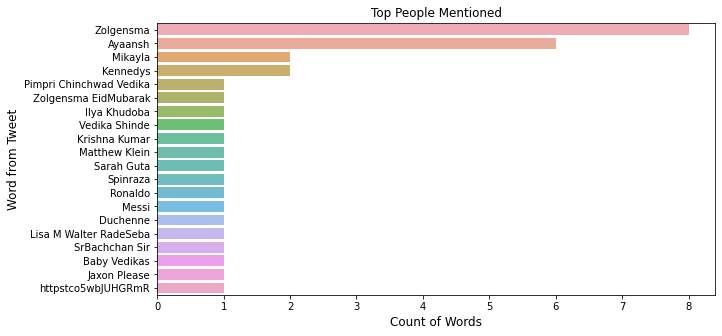

In [24]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()